In [1]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go
import cv2 as cv

from bubbles import *
from utils_visualisation import *

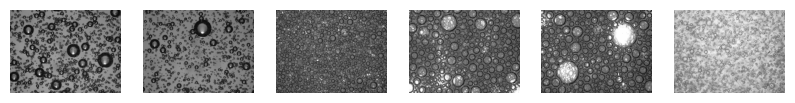

BVFs: [0.08, 0.08, 0.44, 0.81, 0.81, 0]


In [5]:
ims, names = import_photos('data')
BVFs = [0.08, 0.08, 0.44, 0.81, 0.81, 0]
plot_images([ims[0], ims[1], ims[2], ims[3], ims[4], ims[5]])
parameters = {}
print('BVFs:', BVFs)

In [ ]:
parameters['sampling_params'] = [10, 400, 5]
parameters['constellation_threshold'] = 0 #0.02
parameters['image_threshold'] = -0.04
parameters['erosion_size'] = 2
parameters['bubble_scale_factor'] = 1

centres_data = []
for n, im in enumerate(ims[:-1]):
    bvf = BVFs[n]
    centres_data.append(bubbles_from_image(im, parameters, bvf))

# plot_bubbles_on_image(im, centres)

# plt.savefig('data/examples/eg.png', dpi = 200)

0.81


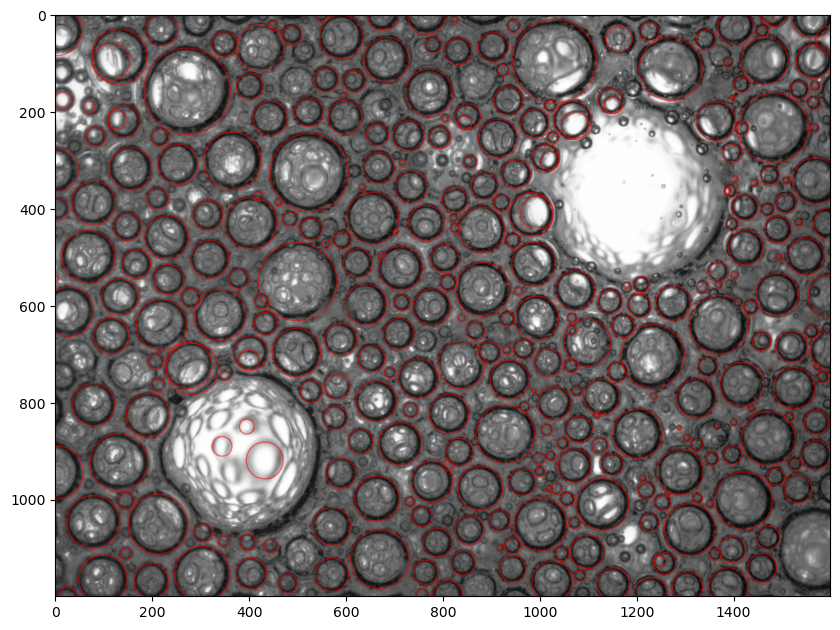

In [12]:
n = 4
print(BVFs[n])
plot_bubbles_on_image(grey[n], centres_data[n], scale_factor=1)

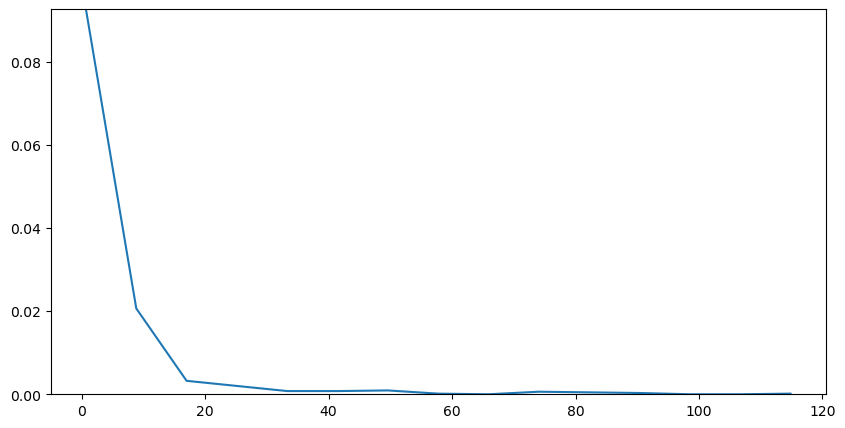

In [33]:
rads = centres[:,2]
rads = rads[~np.isnan(rads)]
rads.sort()
np.cumsum(rads)
# plt.plot(np.cumsum(rads))

freq, bins = np.histogram(rads, bins=15)
bin_width = bins[1]-bins[0]
bin_centres = bins[:-1] - bin_width/2
freq = freq / (freq.sum() * bin_width)

fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylim(0, freq.max())
ax.plot(bin_centres,freq)

Demostrating the threshold model fit:

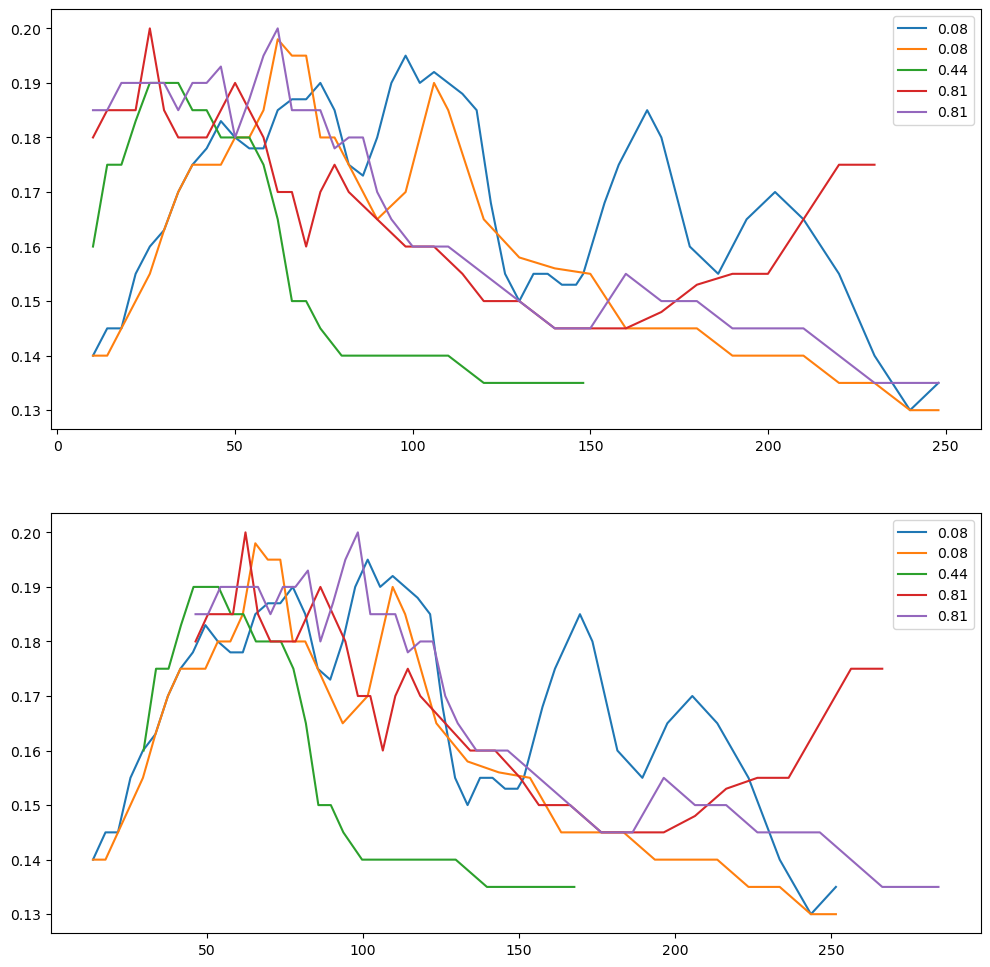

In [7]:
from threshold_testing import threshold_test_data as ttd

threshold_test_data = []
for test in ttd:
    threshold_test_data.append(np.array(test))

# num_plots = 6
# colormap = plt.cm.gist_ncar
# plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

fig, ax = plt.subplots(2,1, figsize = (12,12))
for k, test in enumerate(threshold_test_data[:-1]):
    xx = test[:,0]
    yy = test[:,1]
    ax[0].plot(xx, yy)
ax[0].legend(BVFs)
for k, test in enumerate(threshold_test_data[:-1]):
    xx = test[:,0]
    bvf = BVFs[k]
    yy = test[:,1]
    ax[1].plot(xx + 45*bvf, yy)
ax[1].legend(BVFs)

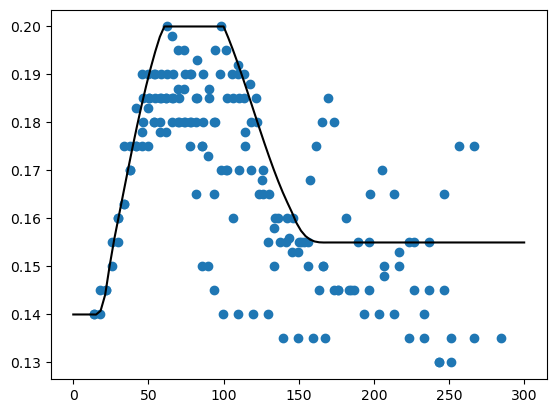

In [8]:
test_points = np.array([]).reshape(0,2)
for k, test in enumerate(threshold_test_data[:-1]):
    xx = test[:,0]
    bvf = BVFs[k]
    yy = test[:,1]
    points = np.stack([xx + 45*bvf, yy], axis = 1)
    test_points = np.concatenate([test_points, points], axis = 0)
plt.scatter(test_points[:,0], test_points[:,1])

x = np.linspace(0, 300, 100)
model = threshold_model(x, 0)

plt.plot(x, model, c = 'k')
# plt.scatter(poly_points[:,0], poly_points[:,1])
# poly(x).shape

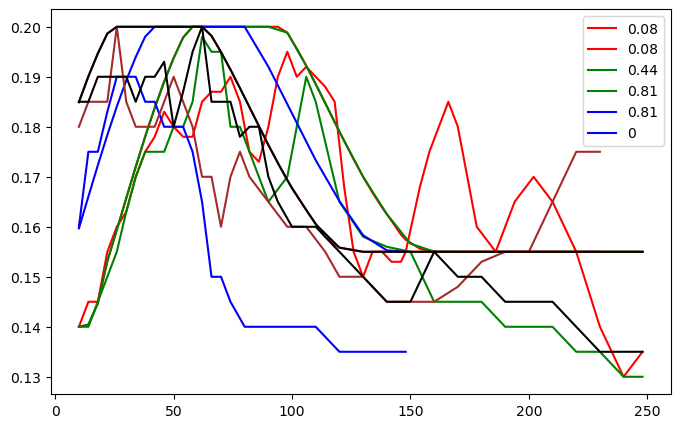

In [9]:
fig, ax = plt.subplots(figsize = (8,5))
cols = ['r', 'g', 'b', 'brown', 'k', 'purple']
for k, test in enumerate(threshold_test_data[:-1]):
    xx = test[:,0]
    yy = test[:,1]
    bvf = BVFs[k]
    ax.plot(xx, yy, c = cols[k])
    ax.plot(xx, threshold_model(xx,bvf), c = cols[k])
ax.legend(BVFs)

In [ ]:
# Threshold testing cell

K = 50
thres = 0.15

Radius = np.arange(lower_bound, upper_bound, radius_rate)[K]
print('Radius:', Radius)
print('Threshold:', thres)
parameters['constellation_threshold'] = [thres,thres]
constellation_thres = threshold_constellation(constellation, parameters)

# Stack the radius layers into a single image.
# constellation_stack = stack_constellation(constellation_thres)

# Remove the tiny signals.
erosion_size = 2
# constellation_stack = erode(constellation_stack, erosion_size)
constellation_stack = erode(constellation_thres[K], erosion_size)

# Compute connected components (number and label of individual bubbles).
number, labels = cv.connectedComponents(constellation_stack, 8)
print('Number:', number)

centres = compute_bubble_centres(constellation_thres, 
                                 constellation_stack, 
                                 number, 
                                 labels, 
                                 parameters,
                                 verbose=False)
plot_bubbles_on_image(im, centres)

# plt.savefig('data/examples/eg.png', dpi = 200)